# Predictive Model For Hotel Booking Cancelations
Taufiqurrahman JCDS 2504-006

# **Business Problem Understanding**

<div style="text-align: center;">
    <img src="Bellagio-Hotel-Casino-Las-Vegas.jpg" width="70%">
</div>

## **Business Understanding**

Perusahaan hotel sering menghadapi tantangan pembatalan reservasi oleh pelanggan, yang dapat berdampak negatif pada pendapatan, pengelolaan kamar, dan efisiensi operasional. Setiap pembatalan yang tidak terduga mengakibatkan kehilangan pendapatan dari kamar yang tidak terjual, terutama jika tidak ada cukup waktu untuk menemukan pelanggan pengganti. Dengan memahami faktor-faktor yang mempengaruhi pembatalan, hotel dapat memprediksi kemungkinan pembatalan lebih awal, mengurangi risiko kehilangan pendapatan, dan mengoptimalkan alokasi kamar serta sumber daya.

Untuk meminimalkan dampak negatif ini, hotel perlu fokus pada pengurangan false negatives, yaitu situasi di mana pelanggan diprediksi tidak akan membatalkan reservasi, tetapi ternyata membatalkan reservasinya. Ini adalah skenario yang paling merugikan, karena hotel tidak siap menghadapi pembatalan mendadak, sehingga kamar kosong dan pendapatan hilang.

## **Problem Statement**

Masalah utama yang ingin dipecahkan oleh **Hotel Revenue Manager** adalah: **"Bagaimana kita dapat memprediksi secara akurat apakah seorang pelanggan akan membatalkan pemesanan hotel atau tidak, sehingga kita dapat mengurangi kehilangan pendapatan akibat kesalahan prediksi?"**

Kami akan mengeksplorasi dua pendekatan untuk menyelesaikan masalah ini:

- Model Prediksi Berbasis Machine Learning: Menggunakan data historis untuk melatih model yang dapat memprediksi kemungkinan pembatalan, dengan mempertimbangkan faktor-faktor seperti tipe pelanggan, deposit, dan riwayat pembatalan.
- Model Berbasis Aturan (Rule-Based): Menggunakan aturan manual yang didesain berdasarkan pola dan tren dalam data, seperti, pelanggan dari wilayah tertentu atau dengan deposit tertentu cenderung lebih mungkin membatalkan.

Dengan membandingkan hasil dari kedua pendekatan ini, kita akan menentukan pendekatan mana yang lebih efektif dalam memberikan akurasi yang tinggi dan sekaligus meminimalkan risiko kehilangan pendapatan akibat kesalahan prediksi.

## **Goal**

Tujuan utama dari proyek ini adalah:

- Mengembangkan model prediksi yang dapat meminimalkan kerugian finansial yang terjadi akibat pembatalan reservasi yang tidak terduga.

- Mengurangi jumlah false negatives dalam prediksi pembatalan, yaitu situasi di mana kita memprediksi bahwa pelanggan tidak akan membatalkan reservasi, tetapi pada kenyataannya mereka membatalkan reservasi. Prediksi yang salah ini sangat merugikan karena hotel tidak punya cukup waktu untuk menjual kembali kamar tersebut.

- Membandingkan pendekatan **machine learning** dengan **rule-based** untuk mengevaluasi metode mana yang lebih efektif dalam memprediksi pembatalan, sekaligus meminimalkan potensi kerugian.

Dengan prediksi yang lebih akurat, hotel dapat mempersiapkan diri untuk pembatalan yang mungkin terjadi, mengurangi jumlah kamar yang kosong, dan mengoptimalkan strategi penjualan kamar sehingga potensi kerugian dapat diminimalkan.

## **Analytic Approach**

Sebagai data scientist pada Hotel XYZ, saya akan melakukan *data preparation* dan menentukan model klasifikasi yang tepat untuk memprediksi. Model klasifikasi yang akan diuji adalah RandomForestClassifier, XGBClassifier, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier, GradientBoostingClassifier

## **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah **F2-score**, yaitu ukuran kinerja model klasifikasi yang menggabungkan dua aspek utama:
1. Kemampuan model dalam mengidentifikasi sebanyak mungkin pelanggan yang benar-benar akan membatalkan reservasi (Recall).
2. Ketepatan model dalam memprediksi pelanggan yang diperkirakan akan membatalkan dan benar-benar melakukan pembatalan (Precision).
3. Dengan memberikan bobot lebih besar pada recall, yaitu dua kali lipat lebih penting dibandingkan precision, agar model lebih fokus pada mengidentifikasi potensi pembatalan (mengurangi false negatives).

---

# Data Understanding

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import normaltest

# splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder

# feature_selection
from sklearn.feature_selection import SelectKBest, f_classif

# resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# preprocessing
from sklearn.compose import ColumnTransformer

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# tuning model
from sklearn.model_selection import GridSearchCV


# pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# metric
from sklearn.metrics import classification_report, fbeta_score, make_scorer, RocCurveDisplay

In [307]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


Dataset ini berisi 83573 data

Berikut adalah kolom yang tersedia pada dataset:
|**Nama Kolom**|**Deskripsi**|
|----------|---------|
|**country**| Negara asal.|
|**market_segment**| Penetapan segmen pasar.|
|**previous_cancellations**| Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.|
|**booking_changes**| Jumlah perubahan yang dilakukan pada pemesanan sejak pemesanan hingga saat check-in atau pembatalan.|
|**deposit_type**| Indikasi apakah pelanggan telah membayar deposit untuk menjamin pemesanan.|
|**days_in_waiting_list**| Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan.|
|**customer_type**| Tipe pemesanan.|
|**reserved_room_type**| Kode tipe kamar yang dipesan. Kode digunakan untuk menjaga kerahasiaan.|
|**required_car_parking_space**| Jumlah tempat parkir mobil yang dibutuhkan oleh pelanggan.|
|**total_of_special_request**| Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya, tempat tidur twin atau lantai tinggi).|
|**is_canceled**| Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).|

# Data Preprocessing

## Duplicated Data

In [309]:
df.duplicated().sum()

73371

Terdapat sebanyak 73371 data duplikat pada dataset. sehingga diperlukannya penghapusan pada data duplikat agar memastikan bahwa analisis dan model yang dibangun didasarkan pada data yang bersih dan tidak terdistorsi, agar dapat meningkatkan akurasi hasil.

In [310]:
df = df.drop_duplicates()
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83515,GBR,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
83543,CHN,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
83554,BEL,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
83562,NLD,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


## Data Splitting

Dataset akan dibagi menjadi dua bagian:
1. 80% data akan menjadi data train untuk melatih model
2. 20% data akan menjadi data test untuk mengevaluasi model


In [311]:
df_train, df_test = train_test_split(df, stratify=df['is_canceled'], random_state=2020, test_size=0.2)

In [312]:
df_train

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
8785,GBR,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,2,0
3400,BRA,Online TA,0,0,No Deposit,0,Transient-Party,A,0,1,0
30996,FRA,Online TA,0,1,No Deposit,0,Transient,A,0,3,1
2743,ISL,Online TA,0,0,No Deposit,0,Transient,A,0,3,0
60887,PRT,Offline TA/TO,0,1,No Deposit,0,Transient,C,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20389,GBR,Online TA,0,0,No Deposit,0,Contract,A,0,3,0
13134,CHN,Online TA,0,0,No Deposit,0,Contract,F,0,1,0
79112,AUT,Online TA,0,1,No Deposit,0,Transient,B,0,1,0
22451,PRT,Complementary,0,1,No Deposit,0,Transient,E,0,0,1


Data train memiliki 8161 data.

In [313]:
df_test

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
34077,FRA,Direct,0,8,No Deposit,0,Transient,A,0,0,0
57404,FRA,Online TA,0,0,No Deposit,0,Transient,F,1,2,0
62048,GBR,Groups,0,2,No Deposit,0,Transient-Party,A,0,2,0
8158,PRT,Online TA,0,0,No Deposit,0,Contract,A,1,2,0
14064,DEU,Online TA,0,0,No Deposit,0,Transient-Party,B,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
17739,NLD,Online TA,0,0,No Deposit,0,Transient,E,0,0,0
30056,ITA,Corporate,0,1,No Deposit,0,Transient,D,1,0,0
79701,BRA,Direct,0,2,No Deposit,0,Transient-Party,A,0,1,0
25685,GRC,Online TA,0,1,No Deposit,0,Transient,D,0,1,0


Data test memiliki 2041 data.

## Missing Values

In [314]:
df_train.isna().sum()/len(df_train)

country                        0.011518
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

In [315]:
for i in df_train.select_dtypes(exclude='number'):
    print(i)
    print(df[i].unique())

country
['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' nan 'KOR'
 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV'
 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN'
 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' 'MWI'
 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP' 'KHM'
 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA' 'MDV'
 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR' 'TZA'
 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO' 'GAB'
 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE' 'BWA'
 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE' 'UGA'
 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']
ma

In [316]:
len(df_train[df_train['market_segment']=='Undefined'])

1

In [317]:
len(df_test[df_test['market_segment']=='Undefined'])

0

Pada data train terdapat 1 data dengan market segment "Undefined", yang akan di convert menjadi NaN.

In [318]:
df_train['market_segment'].replace({'Undefined':np.nan},inplace=True)
print(df_train['market_segment'].unique())

['Offline TA/TO' 'Online TA' 'Direct' 'Corporate' 'Complementary' 'Groups'
 'Aviation' nan]


In [319]:
df_train.isna().sum()/len(df_train)

country                        0.011518
market_segment                 0.000123
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

In [320]:
df_test.isna().sum()/len(df_test)

country                        0.011759
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

Dengan proporsi missing value yang tergolong kecil (di bawah 5%) pada data train dan data test, maka missing value tersebut dapat dihapus. Penghapusan missing value dengan proporsi kecil tidak akan memberikan dampak signifikan terhadap distribusi data dalam data train maupun data test.

In [321]:
# Delete rows with missing value in df_train and df_test
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [322]:
df_train.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

In [323]:
df_test.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

## Outlier

Pada bagian ini kita akan menganalisa apakah ada data outlier pada data train yang dapat berpotensi mengurangi performa model

In [324]:
# Melihat summary descriptive data train
display(df_train.drop('is_canceled',axis=1).describe())

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000
mean,0.089140,0.795686,3.670717,0.166377,0.938011
std,0.829472,1.285104,22.614140,0.397251,1.040590
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000
max,25.000000,21.000000,391.000000,8.000000,5.000000


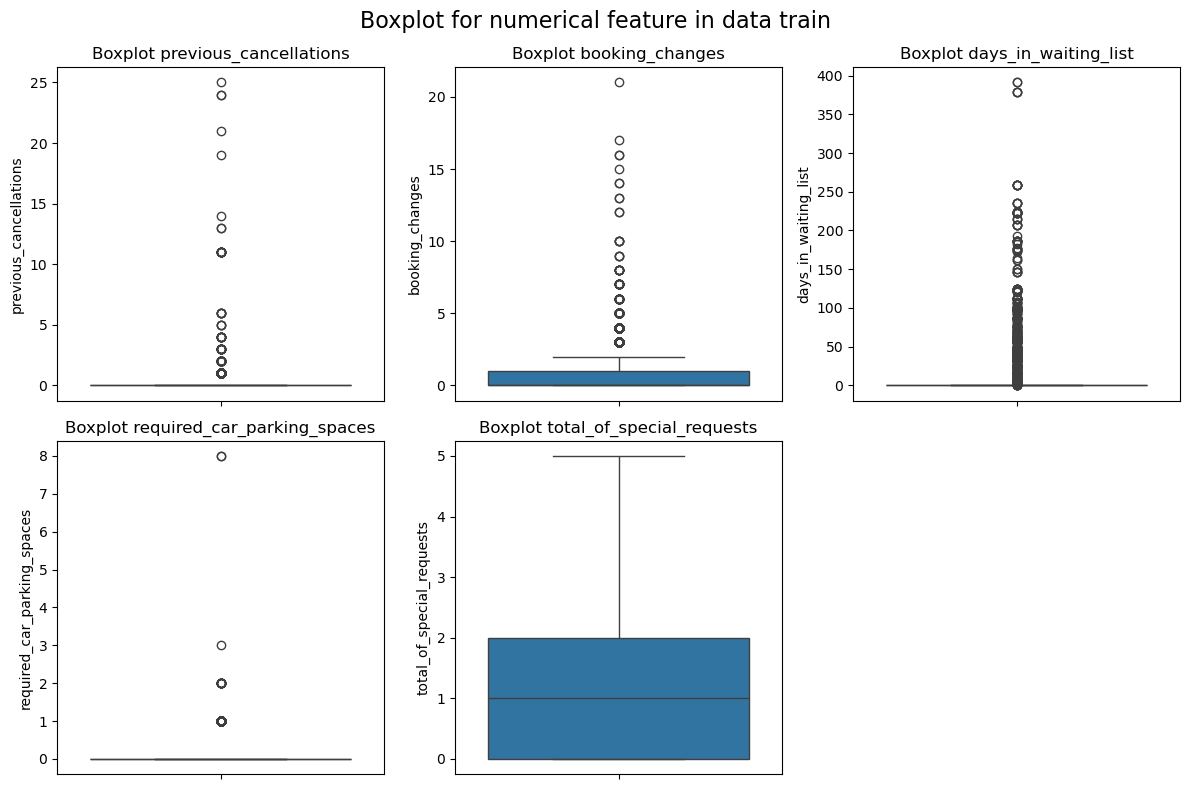

In [325]:
plt.figure(figsize=(12,8))
k=0
for x in df_train.drop('is_canceled',axis=1).select_dtypes(include = 'number').columns:
    # boxplot
    k+=1
    plt.subplot(2,3,k)
    sns.boxplot(y=df_train[x])
    plt.title(f'Boxplot {x}')

plt.suptitle('Boxplot for numerical feature in data train',fontsize=16)
plt.tight_layout()
plt.show()

Dengan ditemukannya outlier pada feature numerik, maka scaler yang digunakan untuk mentransformasi feature numerik adalah **robust scaler**, karena penggunaan robust scaler dapat menghasilkan model yang lebih konsisten pada data yang memiliki outlier

## Normallity Test

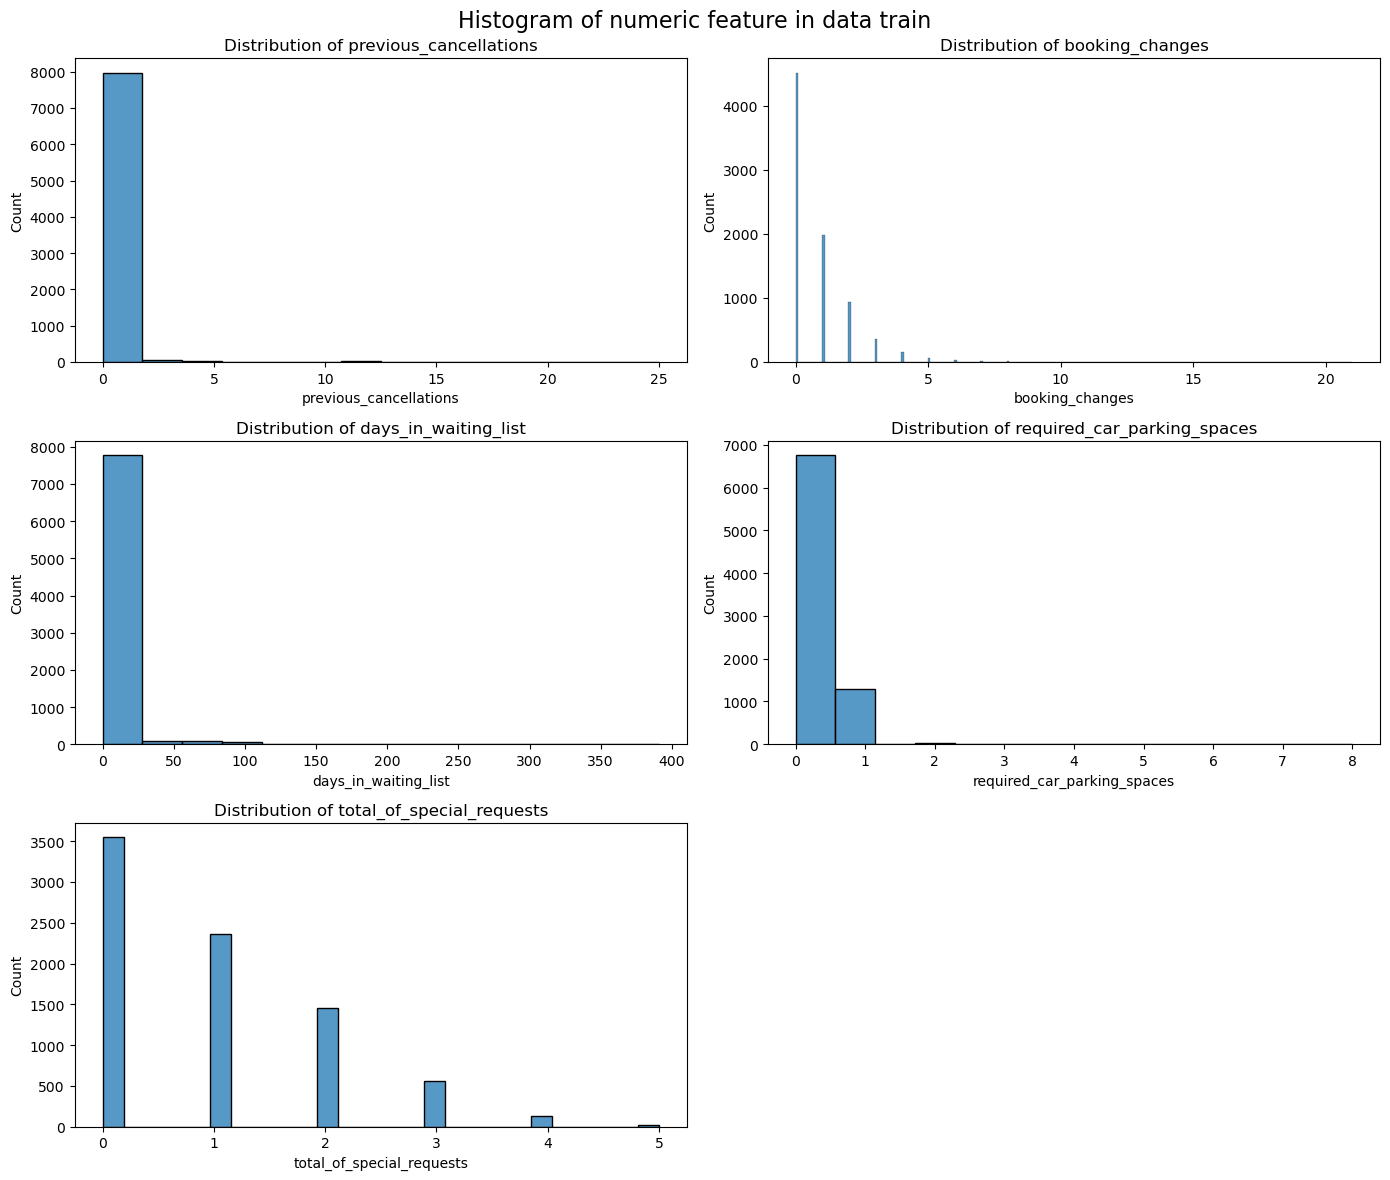

In [326]:
plt.figure(figsize=(14,12))
k=0
for x in df_train.drop('is_canceled',axis=1).select_dtypes(include = 'number').columns:
    k+=1
    plt.subplot(3,2,k)
    sns.histplot(df_train[x])
    plt.title(f'Distribution of {x}')
plt.suptitle('Histogram of numeric feature in data train', fontsize = 16)
plt.tight_layout()
plt.show()

In [327]:
# Apply normaltest to each column and collect the p-values
normality_results = df_train.drop('is_canceled',axis=1).select_dtypes(include='number').apply(lambda col: normaltest(col).pvalue).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,previous_cancellations,0.000000e+00
1,booking_changes,0.000000e+00
2,days_in_waiting_list,0.000000e+00
3,required_car_parking_spaces,0.000000e+00
4,total_of_special_requests,3.130408e-213


In [328]:
normal_col = []
not_normal = []

for i in df_train.drop('is_canceled',axis=1).select_dtypes(include = 'number').columns:
    if normaltest(df_train[i]).pvalue > 0.05:
        normal_col.append(i)
    else:
        not_normal.append(i)
        
print('jumlah kolom yang terdistribusi normal :',len(normal_col))
print('jumlah kolom yang tidak terdistribusi normal :',len(not_normal))

jumlah kolom yang terdistribusi normal : 0
jumlah kolom yang tidak terdistribusi normal : 5


Terlihat semua feature numerik tidak terdistribusi normal, maka pada pipeline semua fitur numerik akan dilakukan scaling menggunakan robust scaler agar model lebih konsisten pada data dengan data outlier.

## Feature Engineering

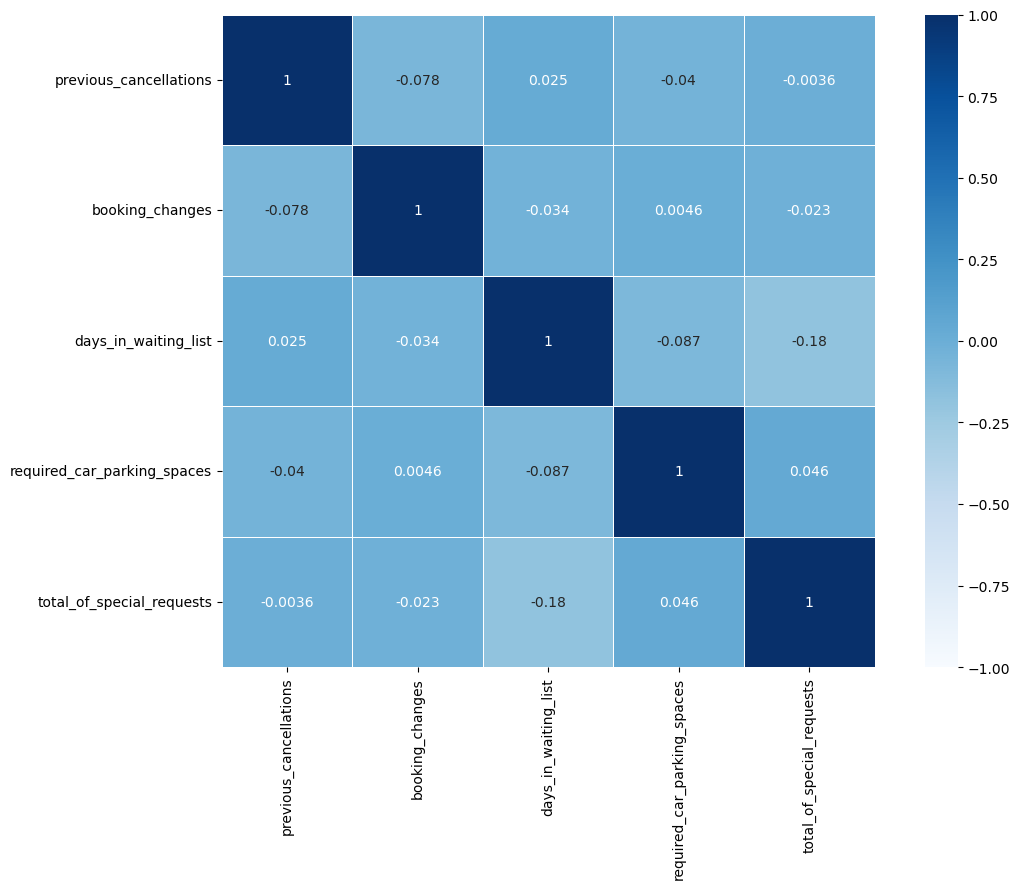

In [329]:
corr = df_train.drop('is_canceled',axis=1).select_dtypes(include='number').corr('spearman')
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap='Blues', annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

insight : Dengan hasil korelasi yang menunjukkan tidak terdapat korelasi tinggi antar feature, maka semua feature numerik dapat digunakan.

In [330]:
for i in df_train.select_dtypes(exclude='number'):
    print(i)
    print(df[i].unique())

country
['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' nan 'KOR'
 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV'
 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN'
 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' 'MWI'
 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP' 'KHM'
 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA' 'MDV'
 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR' 'TZA'
 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO' 'GAB'
 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE' 'BWA'
 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE' 'UGA'
 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']
ma

Dengan jumlah unique value yang terlalu banyak pada kolom country, maka akan di gantikan dengan kolom baru, yaitu kolom continent, yang mana kolom continent dapat mewakili kolom country dengan unique value yang lebih sedikit

In [331]:
# continent mappings
Europe = ['ALB', 'AND', 'AUT', 'BEL', 'BIH',
          'BGR', 'CHE', 'CYP', 'CZE', 'DEU',
          'DNK', 'EST', 'FIN', 'FRA', 'GBR',
          'GRC', 'HRV', 'HUN', 'IRL', 'ITA',
          'LTU', 'LUX', 'LVA', 'MDA', 'MLT',
          'MNE', 'NLD', 'NOR', 'POL', 'PRT',
          'ROU', 'RUS', 'SRB', 'SVK', 'SVN',
          'SWE', 'UKR', 'ISL', 'LIE', 'JEY', 
          'GIB', 'IMN', 'JEY', 'ESP', 'BLR', 
          'MKD', 'FRO', 'GGY']
    
Asia = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD',
        'CHN', 'JPN', 'SGP', 'KOR', 'IDN',
        'IRN', 'IRQ', 'ISR', 'IND', 'LBN',
        'MYS', 'KAZ', 'LKA', 'MMR', 'PHL',
        'PAK', 'QAT', 'RUS', 'SAU', 'SYR',
        'THA', 'TWN', 'TUR', 'VNM', 'LAO',
        'UZB', 'KWT', 'ARE', 'OMN', 'JOR',
        'BHR', 'MAC', 'CN' , 'GEO', 'HKG', 
        'KHM', 'TJK', 'MDV']
        
Africa = ['AGO', 'CIV', 'CAF', 'DZA',
          'EGY', 'ZAF', 'MAR', 'MOZ',
          'TUN', 'LBN', 'GAB', 'ETH',
          'GNB', 'COM', 'GHA', 'SLE',
          'BWA', 'KEN', 'RWA', 'TGO',
          'ZMB', 'LIE', 'TZA', 'UGA',
          'MWI', 'MLI', 'BEN', 'SDN',
          'ZWE', 'BIH', 'BFA', 'DJI',
          'MYT', 'SYC', 'LBY', 'CPV',
          'MUS', 'NGA', 'SEN', 'CMR', 'BDI']
    
North_America = ['CAN', 'CRI', 'CUB', 'DMA',
                 'DOM', 'GRD', 'HND', 'JAM',
                 'MEX', 'PAN', 'PRI', 'SLV',
                 'USA', 'VGB', 'AIA', 'CYM',
                 'ABW', 'TTO', 'GLP', 'LCA', 
                 'BRB', 'KNA', 'GTM', 'NIC']
    
South_America = ['ARG', 'BOL', 'BRA', 'CHL',
                 'COL', 'ECU', 'GUY', 'PRY',
                 'PER', 'URY', 'VEN', 'SUR']
    
Oceania = ['AUS', 'FJI', 'NZL', 'PLW', 'TMP', 'KIR', 'UMI', 'NCL']

Antartica = ['ATA']


df_train['continent'] = np.where(df_train['country'].isin(Asia), 'Asia',
    np.where(df_train['country'].isin(Oceania), 'Oceania',
    np.where(df_train['country'].isin(Europe), 'Europe',
    np.where(df_train['country'].isin(North_America), 'North America',
    np.where(df_train['country'].isin(South_America), 'South America',
    np.where(df_train['country'].isin(Africa), 'Africa',
    np.where(df_train['country'].isin(Antartica), 'Antartica','Other')))))))

df_train.drop('country',axis = 1, inplace=True)
df_train

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,continent
8785,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,2,0,Europe
3400,Online TA,0,0,No Deposit,0,Transient-Party,A,0,1,0,South America
30996,Online TA,0,1,No Deposit,0,Transient,A,0,3,1,Europe
2743,Online TA,0,0,No Deposit,0,Transient,A,0,3,0,Europe
60887,Offline TA/TO,0,1,No Deposit,0,Transient,C,0,0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...
20389,Online TA,0,0,No Deposit,0,Contract,A,0,3,0,Europe
13134,Online TA,0,0,No Deposit,0,Contract,F,0,1,0,Asia
79112,Online TA,0,1,No Deposit,0,Transient,B,0,1,0,Europe
22451,Complementary,0,1,No Deposit,0,Transient,E,0,0,1,Europe


Perlakuan yang sama dilakukan kepada data test

In [332]:
df_test['continent'] = np.where(df_test['country'].isin(Asia), 'Asia',
    np.where(df_test['country'].isin(Oceania), 'Oceania',
    np.where(df_test['country'].isin(Europe), 'Europe',
    np.where(df_test['country'].isin(North_America), 'North America',
    np.where(df_test['country'].isin(South_America), 'South America',
    np.where(df_test['country'].isin(Africa), 'Africa',
    np.where(df_test['country'].isin(Antartica), 'Antartica','Other')))))))

df_test.drop('country',axis = 1, inplace=True)
df_test

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,continent
34077,Direct,0,8,No Deposit,0,Transient,A,0,0,0,Europe
57404,Online TA,0,0,No Deposit,0,Transient,F,1,2,0,Europe
62048,Groups,0,2,No Deposit,0,Transient-Party,A,0,2,0,Europe
8158,Online TA,0,0,No Deposit,0,Contract,A,1,2,0,Europe
14064,Online TA,0,0,No Deposit,0,Transient-Party,B,0,1,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
17739,Online TA,0,0,No Deposit,0,Transient,E,0,0,0,Europe
30056,Corporate,0,1,No Deposit,0,Transient,D,1,0,0,Europe
79701,Direct,0,2,No Deposit,0,Transient-Party,A,0,1,0,South America
25685,Online TA,0,1,No Deposit,0,Transient,D,0,1,0,Europe


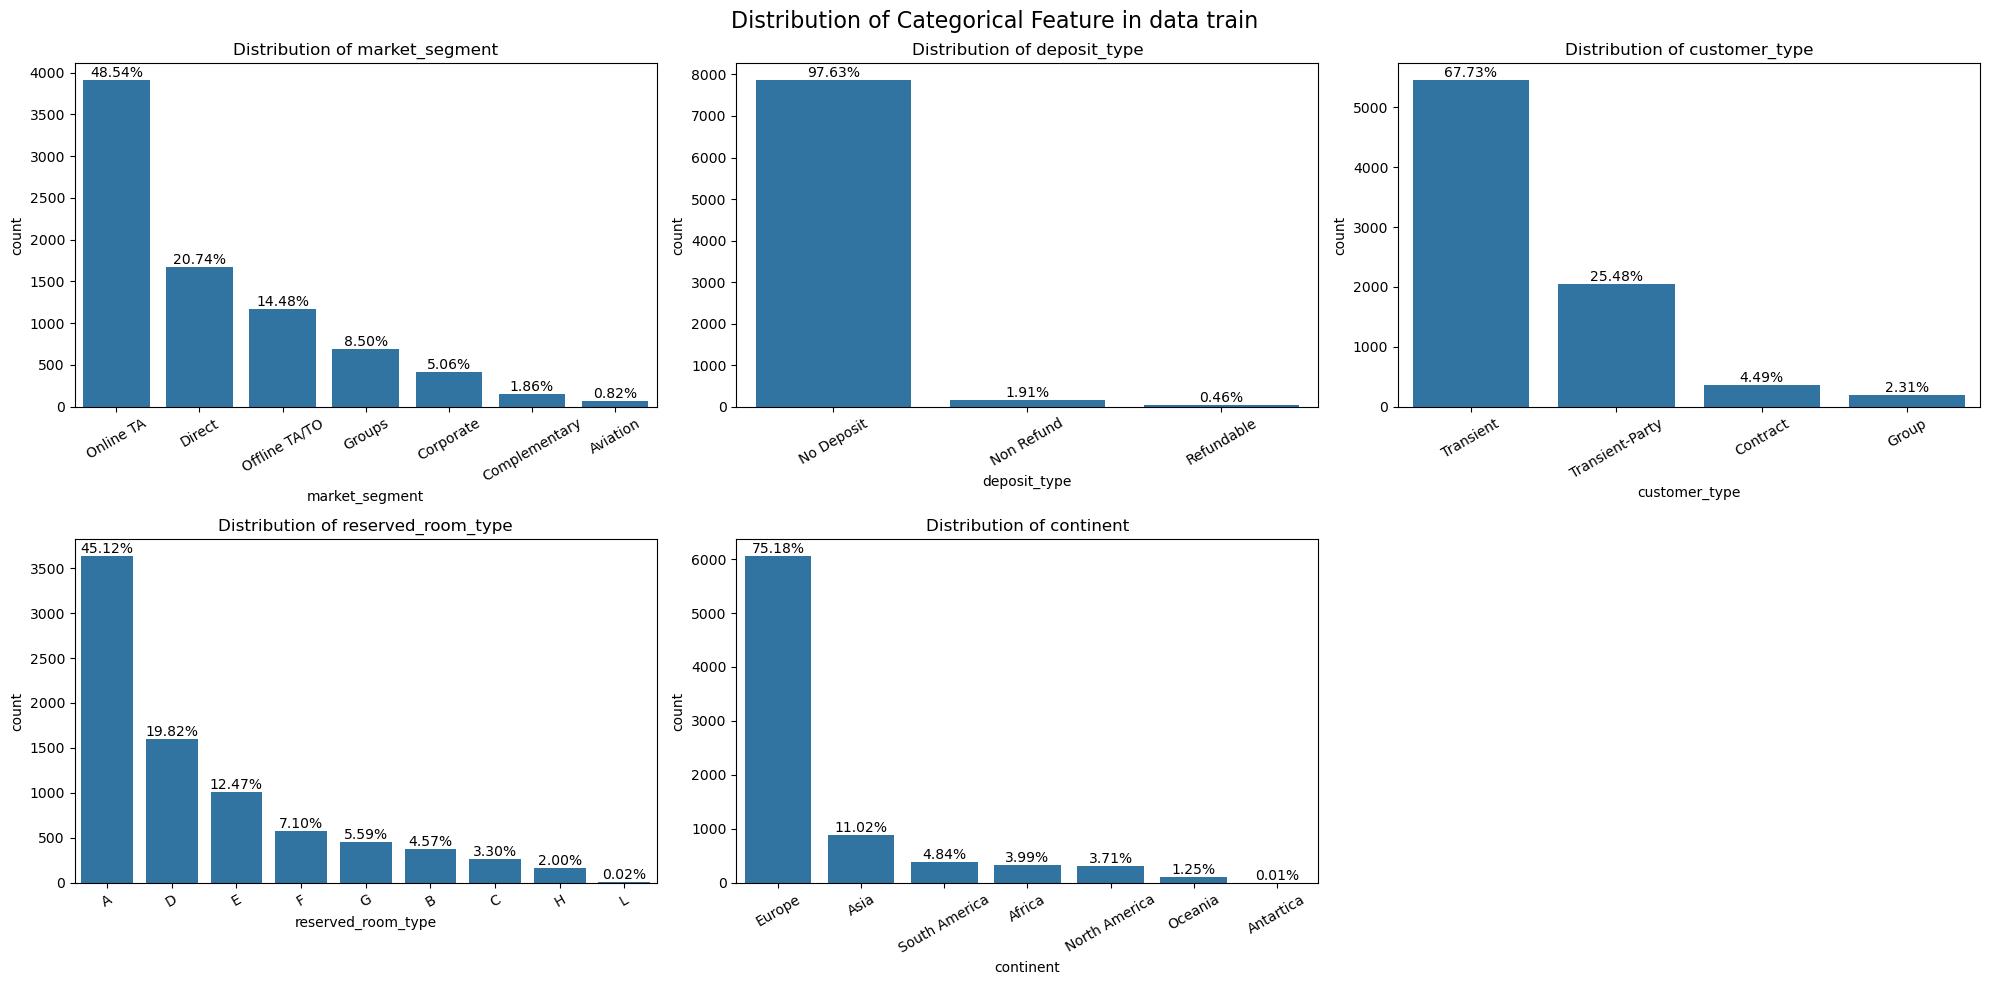

In [333]:
plt.figure(figsize=(20, 10))
k=0
for x in df_train.select_dtypes(include='object'):
    k+=1
    plt.subplot(2,3,k)
    # Hitung frekuensi nilai dari kolom kategorikal
    count_values = df_train[x].value_counts(ascending=False)
    
    # Plot countplot dengan urutan sesuai jumlah kemunculan
    ax = sns.countplot(data=df_train, x=x, order=count_values.index)
    plt.xticks(rotation=30)
    plt.title(f'Distribution of {x}')
    
    # Hitung nilai relatif dalam persen
    rel_values = count_values.values / len(df_train) * 100
    
    # Buat label untuk setiap bar
    lbls = [f'{p:1.2f}%' for p in rel_values]
    
    # Pastikan jumlah bar dan label sama, lalu tambahkan label
    if len(ax.containers[0]) == len(lbls):
        ax.bar_label(container=ax.containers[0], labels=lbls)
    else:
        print(f'Warning: number of bars ({len(ax.containers[0])}) and labels ({len(lbls)}) do not match.')
plt.suptitle('Distribution of Categorical Feature in data train',fontsize = 16)
plt.tight_layout()
plt.show()


Insight:

Market Segment Distribution:

- The majority of the bookings come through online travel agencies, with fewer bookings via corporate or complementary channels.

Deposit Type Distribution:

- Most bookings are made without any deposit, suggesting flexibility in the booking policy.

Customer Type Distribution:

- The overwhelming majority of customers are independent travelers (transient), while group and contract bookings are much less frequent.

Reserved Room Type Distribution:

- Room type "A" is by far the most favored, indicating it might be the standard or most affordable option.

Continent Distribution:

- The majority of customers are European, which suggests that the business may be targeting or appealing more to European customers.

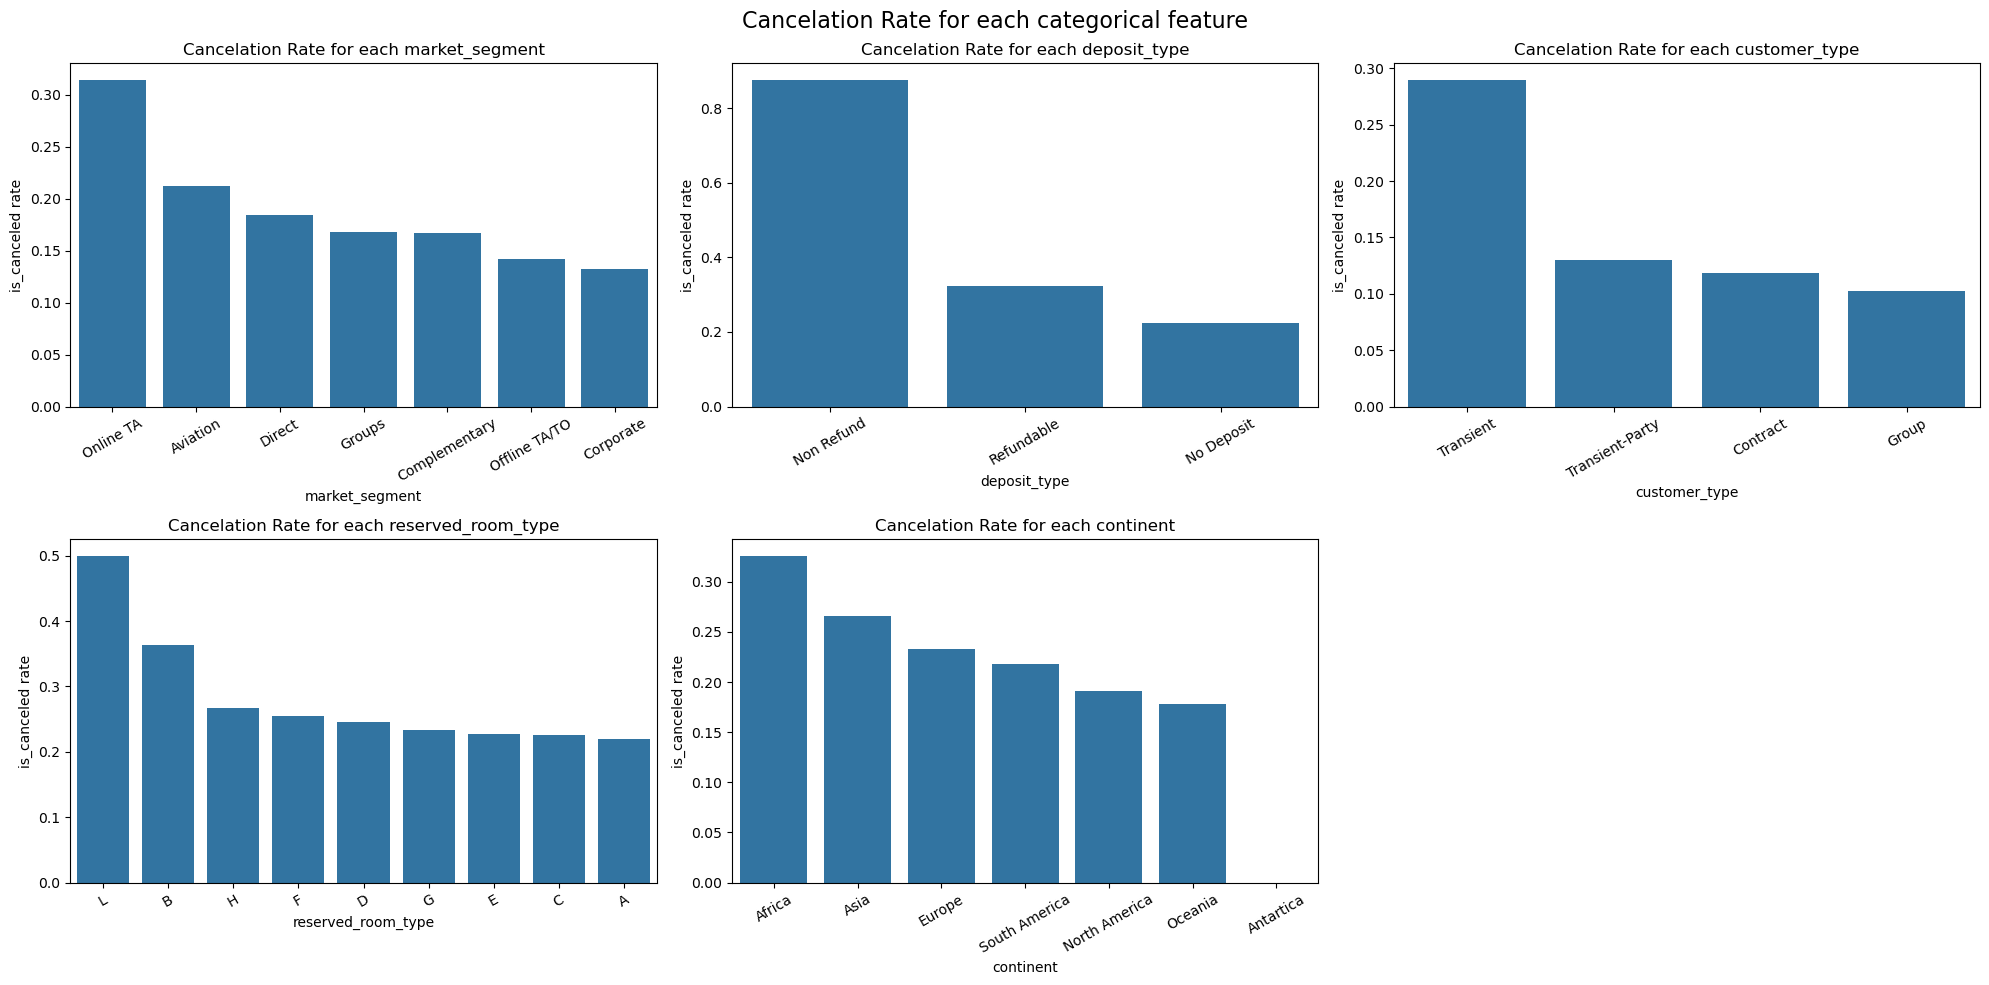

In [334]:
plt.figure(figsize=(20, 10))
k=0
for x in df_train.select_dtypes(include='object'):
    k+=1
    plt.subplot(2,3,k)

    ax = sns.barplot(data=df_train.groupby(x)['is_canceled'].mean().sort_values(ascending=False).reset_index(), x=x,y='is_canceled')
    plt.ylabel('is_canceled rate')
    plt.xticks(rotation=30)
    plt.title(f'Cancelation Rate for each {x}')

plt.suptitle('Cancelation Rate for each categorical feature', fontsize=16)
plt.tight_layout()
plt.show()


insight:

Semua feature categorical memiliki pola terhadap label, maka semua categorical feature dapat digunakan untuk melakukan modeling dengan tujuan cancel prediction

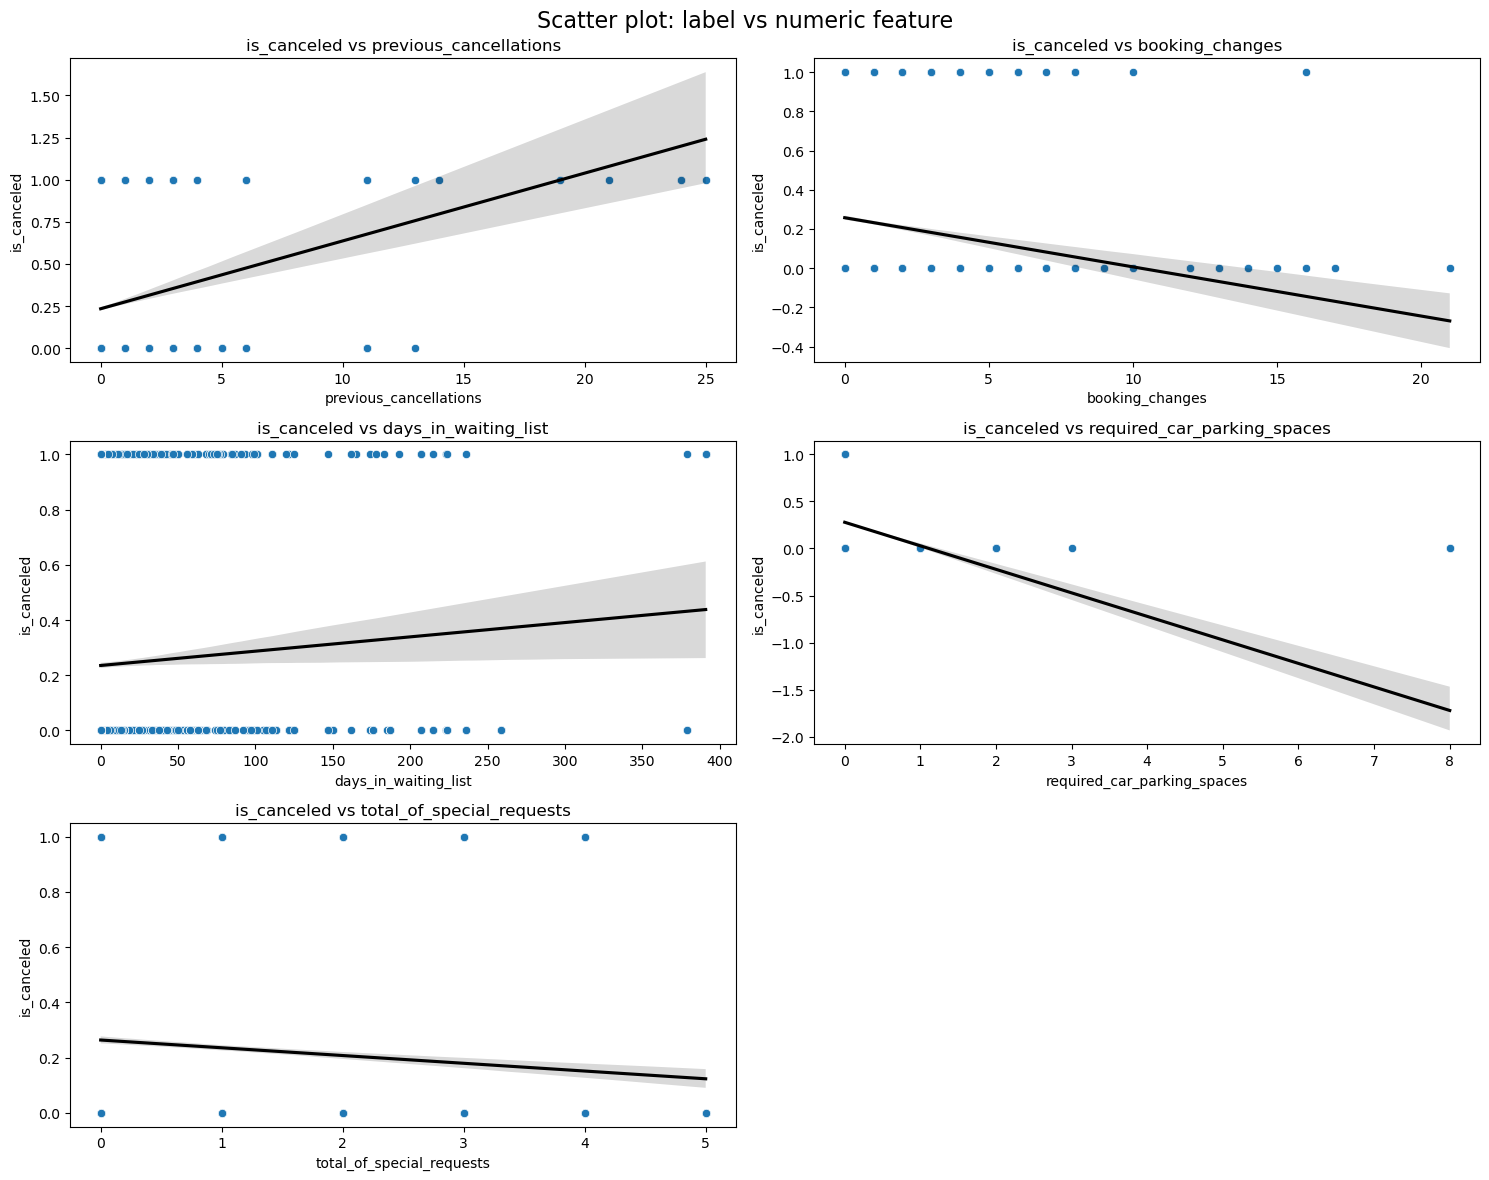

In [335]:
plt.figure(figsize=(15, 12))
k=0
for x in df_train.select_dtypes(include='number').columns:
    if x !='is_canceled':
        # Plot hasilnya
        k+=1
        plt.subplot(3,2,k)
        plt.title(f'is_canceled vs {x}')
        sns.scatterplot(data=df_train, x=x, y='is_canceled')
        sns.regplot(data=df_train, x=x, y='is_canceled',scatter=False,color='black')
    else:
        continue

plt.suptitle('Scatter plot: label vs numeric feature',fontsize=16)
plt.tight_layout()
plt.show()


insight:

Semua feature numerical memiliki pola terhadap label, maka semua numerical feature dapat digunakan untuk melakukan modeling dengan tujuan cancel prediction

## Data Imbalance Checking

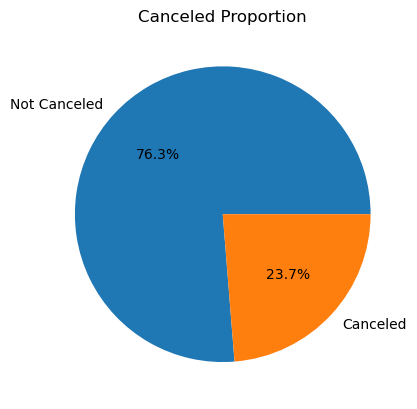

In [336]:
train_agg=df_train['is_canceled'].value_counts(normalize=1).reset_index()
train_agg['percentage']=100*train_agg['proportion']
train_agg

plt.pie(data=train_agg,x='percentage',labels=['Not Canceled','Canceled'], autopct='%1.1f%%'
       ,textprops=dict(color="black"))
plt.title('Canceled Proportion')
plt.show()

insight:

Dengan proporsi label yang imbalance, maka diperlukannya resampling, dengan tujuan agar model tidak bias terhadap label dengan proporsi yang lebih besar.

## Define feature and label

In [337]:
X_train = df_train.drop('is_canceled',axis = 1)
y_train = df_train['is_canceled']
X_test = df_test.drop('is_canceled',axis = 1)
y_test = df_test['is_canceled']

In [338]:
col_num = X_train.select_dtypes(include = 'number').columns
col_cat = X_train.select_dtypes(exclude = 'number').columns

preprocessor=ColumnTransformer(
    transformers=[
                ('Num',Pipeline([
                    ('scaler',RobustScaler())]), 
                 col_num),
                ('Cat',Pipeline([
                    ('Encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))]), 
                 col_cat)  
])

X_train_scaled = preprocessor.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = preprocessor.get_feature_names_out()


In [339]:
X_train_scaled

,Num__previous_cancellations,Num__booking_changes,Num__days_in_waiting_list,Num__required_car_parking_spaces,Num__total_of_special_requests,Cat__market_segment_Complementary,Cat__market_segment_Corporate,Cat__market_segment_Direct,Cat__market_segment_Groups,Cat__market_segment_Offline TA/TO,...,Cat__reserved_room_type_F,Cat__reserved_room_type_G,Cat__reserved_room_type_H,Cat__reserved_room_type_L,Cat__continent_Antartica,Cat__continent_Asia,Cat__continent_Europe,Cat__continent_North America,Cat__continent_Oceania,Cat__continent_South America
0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8063,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8064,0.0,1.0,0.0,0.0,-0.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---

# Modelling and Evaluation

## Modelling with Machine Learning

### Finding Best model

In [340]:
# Define F2 Score for finding best model with GridSearchCV
f2_scorer = make_scorer(fbeta_score, beta=2)

In [341]:
#Preprocessing
col_num = X_train.select_dtypes(include = 'number').columns
col_cat = X_train.select_dtypes(exclude = 'number').columns

preprocessor=ColumnTransformer(
    transformers=[
                ('Num',Pipeline([
                    ('scaler',RobustScaler())]), 
                 col_num),
                ('Cat',Pipeline([
                    ('Encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))]), 
                 col_cat)  
])


#modeling pipeline
pipeline=ImbPipeline(steps=[('preprocessor',preprocessor),
                            ('feature_selection',SelectKBest(score_func=f_classif)),
                            ('resampler', SMOTE()),     # Placeholder for resampler
                            ('classifier', RandomForestClassifier())    # Placeholder for classifier
])


#parameter tuning
param_grid=[
    {'feature_selection__k':[10,20,'all'],'resampler': [SMOTE(random_state=1),RandomOverSampler(random_state=1),None],'classifier': [RandomForestClassifier(random_state=1)]},
    {'feature_selection__k':[10,20,'all'],'resampler': [SMOTE(random_state=1),RandomOverSampler(random_state=1),None],'classifier': [XGBClassifier(random_state=1)]},
    {'feature_selection__k':[10,20,'all'],'resampler': [SMOTE(random_state=1),RandomOverSampler(random_state=1),None],'classifier': [DecisionTreeClassifier(random_state=1)]},
    {'feature_selection__k':[10,20,'all'],'resampler': [SMOTE(random_state=1),RandomOverSampler(random_state=1),None],'classifier': [LogisticRegression(random_state=1)]},
    {'feature_selection__k':[10,20,'all'],'resampler': [SMOTE(random_state=1),RandomOverSampler(random_state=1),None],'classifier': [KNeighborsClassifier()]},
    {'feature_selection__k':[10,20,'all'],'resampler': [SMOTE(random_state=1),RandomOverSampler(random_state=1),None],'classifier': [GradientBoostingClassifier(random_state=1)]}
]

#tuning parameter terbaik
gscv=GridSearchCV(pipeline, param_grid,cv=5,n_jobs=-1,scoring=f2_scorer)

#create fitting time
start_time=time.time()

#fit gridsearchCV ke data
gscv.fit(X_train,y_train)

end_time=time.time()

fitting_time=end_time-start_time

print(f"fitting time : {fitting_time:.2f} second")

fitting time : 12.80 second


In [342]:
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_feature_selection__k,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
52,0.922211,0.139149,0.011195,0.002636,GradientBoostingClassifier(random_state=1),all,RandomOverSampler(random_state=1),{'classifier': GradientBoostingClassifier(rand...,0.653933,0.699682,0.681717,0.684402,0.690670,0.682081,0.015372,1
31,0.144467,0.021676,0.014010,0.000686,LogisticRegression(random_state=1),20,RandomOverSampler(random_state=1),{'classifier': LogisticRegression(random_state...,0.653133,0.700935,0.675853,0.687500,0.690191,0.681522,0.016284,2
34,0.163597,0.022134,0.013447,0.002636,LogisticRegression(random_state=1),all,RandomOverSampler(random_state=1),{'classifier': LogisticRegression(random_state...,0.647214,0.702571,0.672656,0.685484,0.695556,0.680696,0.019534,3
30,0.180862,0.026505,0.016167,0.004359,LogisticRegression(random_state=1),20,SMOTE(random_state=1),{'classifier': LogisticRegression(random_state...,0.652845,0.703883,0.672489,0.681614,0.687890,0.679744,0.016904,4
49,0.827634,0.071900,0.013735,0.001214,GradientBoostingClassifier(random_state=1),20,RandomOverSampler(random_state=1),{'classifier': GradientBoostingClassifier(rand...,0.648065,0.700274,0.681309,0.673254,0.685558,0.677692,0.017218,5
13,0.150357,0.026831,0.015557,0.001964,"XGBClassifier(base_score=None, booster=None, c...",20,RandomOverSampler(random_state=1),"{'classifier': XGBClassifier(base_score=None, ...",0.655032,0.687269,0.673759,0.694570,0.676417,0.677409,0.013467,6
1,0.614709,0.080451,0.047595,0.018407,RandomForestClassifier(random_state=1),10,RandomOverSampler(random_state=1),{'classifier': RandomForestClassifier(random_s...,0.646845,0.697987,0.688295,0.669418,0.681404,0.676790,0.017629,7
33,0.185119,0.023388,0.013467,0.002404,LogisticRegression(random_state=1),all,SMOTE(random_state=1),{'classifier': LogisticRegression(random_state...,0.637494,0.703473,0.665208,0.684282,0.689346,0.675961,0.022806,8
48,0.889087,0.051438,0.013217,0.000858,GradientBoostingClassifier(random_state=1),20,SMOTE(random_state=1),{'classifier': GradientBoostingClassifier(rand...,0.653951,0.694639,0.674944,0.667760,0.681186,0.674496,0.013551,9
45,0.617761,0.038960,0.013817,0.001498,GradientBoostingClassifier(random_state=1),10,SMOTE(random_state=1),{'classifier': GradientBoostingClassifier(rand...,0.643610,0.685728,0.685053,0.678439,0.678955,0.674357,0.015665,10


In [343]:
base_model = gscv.best_estimator_
base_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type',
       'continent'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k='all')),
                ('resampler', RandomOverSampler(random_state=1)),
                ('classifier', GradientBoostingClassifier(random_state=1))])

In [344]:
y_pred_train = base_model.predict(X_train)

print(f'\nF2-score with Base Model = {round(fbeta_score(y_train,y_pred_train,beta=2),3)}\n{classification_report(y_train,y_pred_train)}')


F2-score with Base Model = 0.697
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      6152
           1       0.46      0.80      0.58      1914

    accuracy                           0.73      8066
   macro avg       0.69      0.75      0.69      8066
weighted avg       0.81      0.73      0.75      8066



Model yang menghasilkan F2 score terbaik adalah model **GradientBoostingClassifier**, dengan resampling menggunakan RandomOverSampler dan menggunakan semua feature yang tersedia.

### Hyperparameter Tuning

In [345]:
#Preprocessing
col_num = X_train.select_dtypes(include = 'number').columns
col_cat = X_train.select_dtypes(exclude = 'number').columns

preprocessor=ColumnTransformer(
    transformers=[
                ('Num',Pipeline([
                    ('scaler',RobustScaler())]), 
                 col_num),
                ('Cat',Pipeline([
                    ('Encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))]), 
                 col_cat)  
])


# modeling pipeline
pipeline=ImbPipeline(steps=[('preprocessor',preprocessor),
                            ('smote', RandomOverSampler(random_state=1)),
                            ('classifier', GradientBoostingClassifier(random_state=1))
])


# parameter tuning
param_grid=[
    {'classifier__n_estimators':[100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf':[1, 2, 5]}
    ]


# tuning parameter terbaik
gscv=GridSearchCV(pipeline, param_grid,cv=5,n_jobs=-1,scoring=f2_scorer)

# create fitting time
start_time=time.time()

# fit gridsearchCV ke data
gscv.fit(X_train,y_train)

end_time=time.time()

fitting_time=end_time-start_time

print(f"fitting time : {fitting_time:.2f} second")

fitting time : 314.09 second


In [346]:
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
95,3.101675,0.164367,0.020837,0.002637,0.05,3,2,5,300,"{'classifier__learning_rate': 0.05, 'classifie...",0.653447,0.701357,0.679372,0.697148,0.688869,0.684039,0.017045,1
175,2.380634,0.169989,0.020569,0.004349,0.10,3,2,5,200,"{'classifier__learning_rate': 0.1, 'classifier...",0.654037,0.695077,0.678571,0.697464,0.693364,0.683703,0.016239,2
98,2.960877,0.135132,0.017787,0.001154,0.05,3,2,10,300,"{'classifier__learning_rate': 0.05, 'classifie...",0.655405,0.701675,0.676404,0.694570,0.688869,0.683385,0.016256,3
92,3.075468,0.082588,0.018821,0.001738,0.05,3,2,2,300,"{'classifier__learning_rate': 0.05, 'classifie...",0.653447,0.701357,0.679372,0.697148,0.685558,0.683377,0.016909,4
166,2.406743,0.212856,0.021493,0.003468,0.10,3,1,5,200,"{'classifier__learning_rate': 0.1, 'classifier...",0.654815,0.695077,0.677852,0.695455,0.693681,0.683376,0.015718,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,6.389883,0.253315,0.026883,0.001110,0.10,7,2,10,300,"{'classifier__learning_rate': 0.1, 'classifier...",0.614961,0.625579,0.626126,0.614525,0.636531,0.623545,0.008179,239
230,6.732185,0.214698,0.027190,0.002303,0.10,7,2,5,300,"{'classifier__learning_rate': 0.1, 'classifier...",0.606618,0.618938,0.625847,0.613340,0.628466,0.618642,0.008015,240
227,6.807509,0.223293,0.029117,0.004997,0.10,7,2,2,300,"{'classifier__learning_rate': 0.1, 'classifier...",0.613036,0.625288,0.617901,0.605706,0.627017,0.617790,0.007874,241
218,6.917521,0.185345,0.028711,0.003820,0.10,7,1,2,300,"{'classifier__learning_rate': 0.1, 'classifier...",0.618107,0.625866,0.628959,0.587130,0.625288,0.617070,0.015387,242


In [347]:
tuned_model = gscv.best_estimator_
tuned_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type',
       'continent'],
      dtype='object'))])),
                ('smote', RandomOverSampler(random_state=1)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            min_samples_leaf=2,
                                            min_samples_split=5,
                                            n_estimators=300,
                                            random_state=1))])

Parameter pada model GradientBoostingClassifier yang menghasilkan F2 score terbaik adalah learning_rate = 0.05, min_samples_leaf = 2, min_samples_split = 5 dan n_estimator = 300.

In [348]:
y_pred_train = tuned_model.predict(X_train)

print(f'F2-score with Tuned Model = {round(fbeta_score(y_train,y_pred_train,beta=2),3)}\n{classification_report(y_train,y_pred_train)}')

F2-score with Tuned Model = 0.704
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      6152
           1       0.46      0.81      0.59      1914

    accuracy                           0.73      8066
   macro avg       0.69      0.76      0.69      8066
weighted avg       0.81      0.73      0.75      8066



### Feature Importance

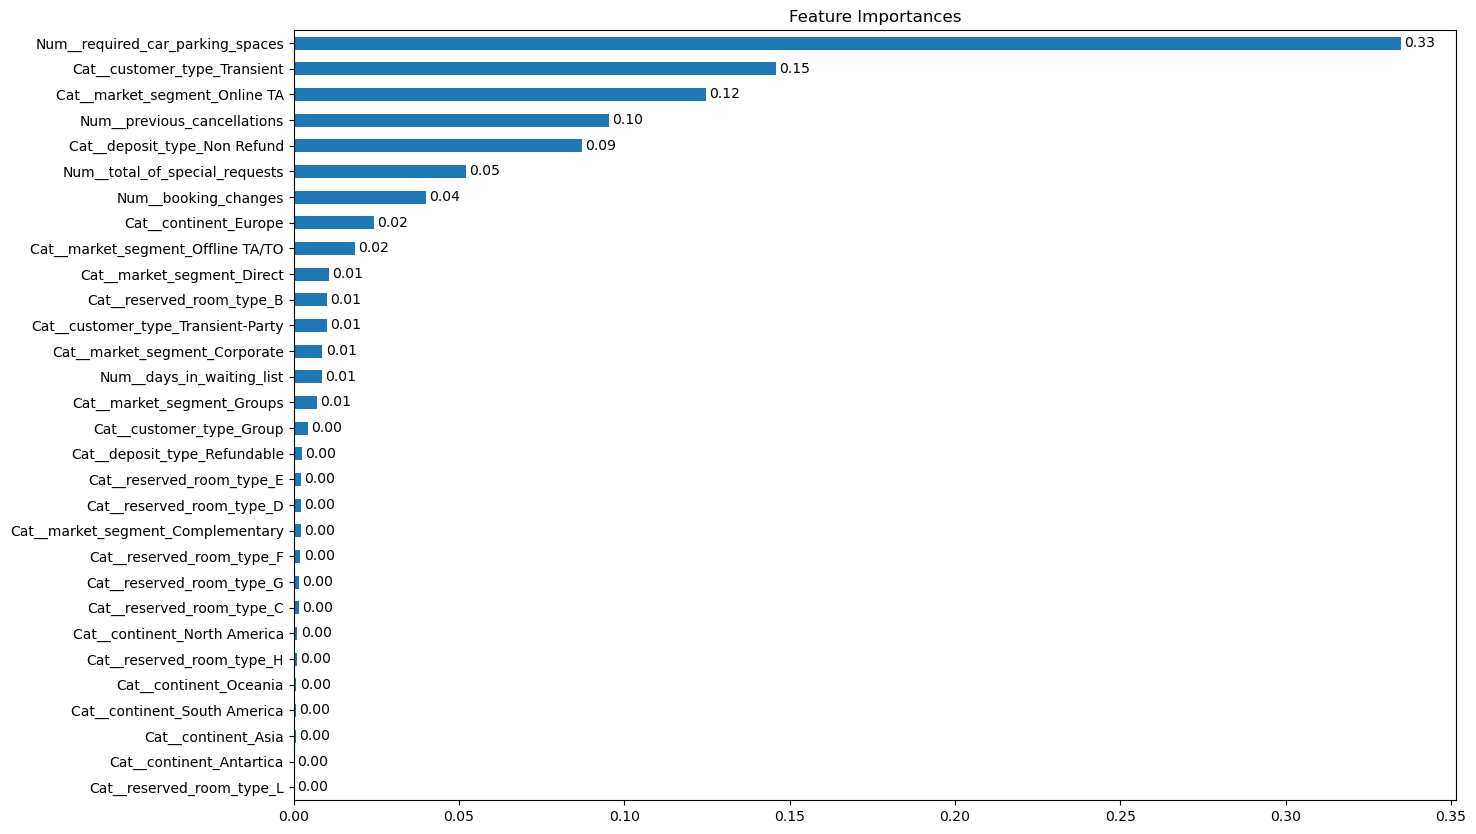

In [349]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Get the feature importances from the final estimator
feature_importances = final_estimator.feature_importances_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=X_train_encoded.columns).sort_values()

# Plot the feature importances

plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances')


# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # position x (at the end of the bar)
            i.get_y() + i.get_height() / 2,  # position y (middle of the bar)
            f'{i.get_width():.2f}',  # text to display (feature importance value)
            ha='left',  # horizontal alignment (left align)
            va='center')  # vertical alignment (center align)
plt.show()

Faktor Utama yang Mempengaruhi Pembatalan reservasi:
1. **Required Car Parking Spaces (0.33)**:
   - Jumlah ruang parkir yang dibutukan memiliki pengaruh paling tinggi terhadap tingkat pembatalan reservasi

2. **Customer Type Transient (0.15)**
3. **Market Segment Online TA (0.12)**
4. **Previous Cancelation (0.10)**
5. **Deposit Type Non-Refund (0.09)**

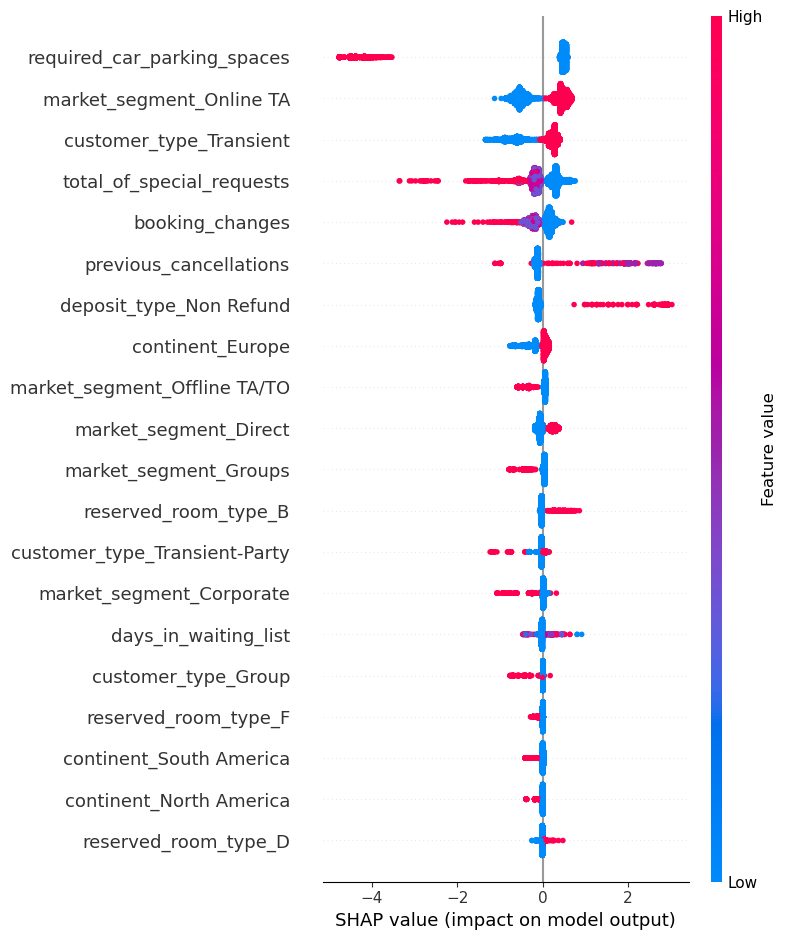

In [350]:
import shap
# Transform X_train before using SHAP
X_train_transformed = tuned_model.named_steps['preprocessor'].transform(X_train)

# Retrieve feature names after OneHotEncoding
onehot_feature_names = tuned_model.named_steps['preprocessor'].transformers_[1][1]['Encoder'].get_feature_names_out(col_cat)

# Combine numeric and encoded categorical feature names
all_feature_names = np.concatenate([col_num, onehot_feature_names])

# Use SHAP with the classifier directly
explainer = shap.Explainer(tuned_model.named_steps['classifier'])
shap_values = explainer(X_train_transformed)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=all_feature_names)

Insight dari Nilai SHAP:

1. **Required Car Parking Spaces**:
   - Pemesanan dengan kebutuhan parkir lebih banyak cenderung **tidak dibatalkan**.
2. **Market Segment Online TA**:
   - Pemesanan melalui OTA lebih berisiko dibatalkan.
3. **Customer Type Transient**:
   - Pelanggan transient lebih mungkin membatalkan.
4. **Total of Special Requests**:
   - Banyak permintaan khusus menurunkan risiko pembatalan.
5. **Booking Changes**:
   - Semakin sering perubahan, semakin rendah risiko pembatalan.
6. **Previous Cancelation**:
   - Tamu dengan riwayat pembatalan lebih mungkin membatalkan lagi.
7. **Deposit Type Non-Refund**:
   - Opsi non-refundable meningkatkan risiko pembatalan.

### Threshold Optimization

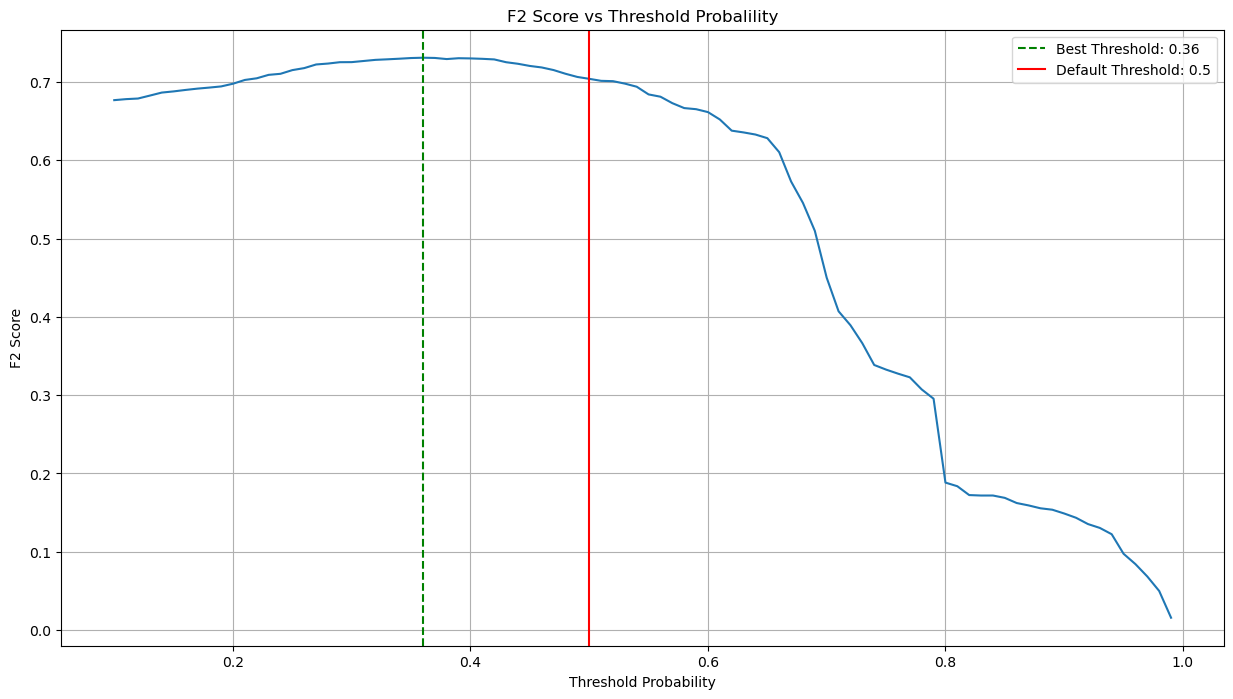

In [351]:
# Calculate the threshold values
th_value = [i/100 for i in range(10,100)]
score_list = []

# Loop through threshold values and calculate fbeta scores
for i in th_value:
    y_pred_proba = tuned_model.predict_proba(X_train)[:, 1]
    y_pred_nt = np.where(y_pred_proba > i, 1, 0)
    score_temp = fbeta_score(y_train, y_pred_nt, beta=2)
    score_list.append(score_temp)

# Find the index of the highest score and corresponding threshold
max_index = np.argmax(score_list)
best_threshold = th_value[max_index]

# Plotting
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value, y=score_list)
plt.xlabel('Threshold Probability')
plt.ylabel('F2 Score')
plt.title('F2 Score vs Threshold Probalility')

# Plot a vertical line at the threshold with the highest score
plt.axvline(x=best_threshold, linestyle='--', color='green', label=f'Best Threshold: {best_threshold:.2f}')

plt.axvline(x=0.5, color='red', label=f'Default Threshold: 0.5')

# Show the plot
plt.grid()
plt.legend()
plt.show()


In [352]:
y_pred_train = tuned_model.predict_proba(X_train)[:, 1]

y_pred_train = np.where(y_pred_train>best_threshold,1,0)

print(f'Dengan threshold probabilitas: {best_threshold}')
print(f'F2-score = {round(fbeta_score(y_train,y_pred_train,beta=2),3)}\n{classification_report(y_train,y_pred_train)}')

Dengan threshold probabilitas: 0.36
F2-score = 0.731
              precision    recall  f1-score   support

           0       0.96      0.57      0.72      6152
           1       0.40      0.92      0.56      1914

    accuracy                           0.65      8066
   macro avg       0.68      0.75      0.64      8066
weighted avg       0.83      0.65      0.68      8066



### Metric Evaluation

In [353]:
y_pred_train = tuned_model.predict_proba(X_train)[:, 1]
y_pred_test = tuned_model.predict_proba(X_test)[:, 1]

y_pred_train = np.where(y_pred_train>best_threshold,1,0)
y_pred_test = np.where(y_pred_test>best_threshold,1,0)

print(f'Dengan threshold probabilitas: {best_threshold}')
print(f'Performa pada data train:\nF2-score = {round(fbeta_score(y_train,y_pred_train,beta=2),3)}\n{classification_report(y_train,y_pred_train)}')
print(f'Performa pada data test:\nF2-score = {round(fbeta_score(y_test,y_pred_test,beta=2),3)}\n{classification_report(y_test,y_pred_test)}')

Dengan threshold probabilitas: 0.36
Performa pada data train:
F2-score = 0.731
              precision    recall  f1-score   support

           0       0.96      0.57      0.72      6152
           1       0.40      0.92      0.56      1914

    accuracy                           0.65      8066
   macro avg       0.68      0.75      0.64      8066
weighted avg       0.83      0.65      0.68      8066

Performa pada data test:
F2-score = 0.704
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1536
           1       0.40      0.88      0.54       481

    accuracy                           0.65      2017
   macro avg       0.67      0.73      0.63      2017
weighted avg       0.81      0.65      0.68      2017



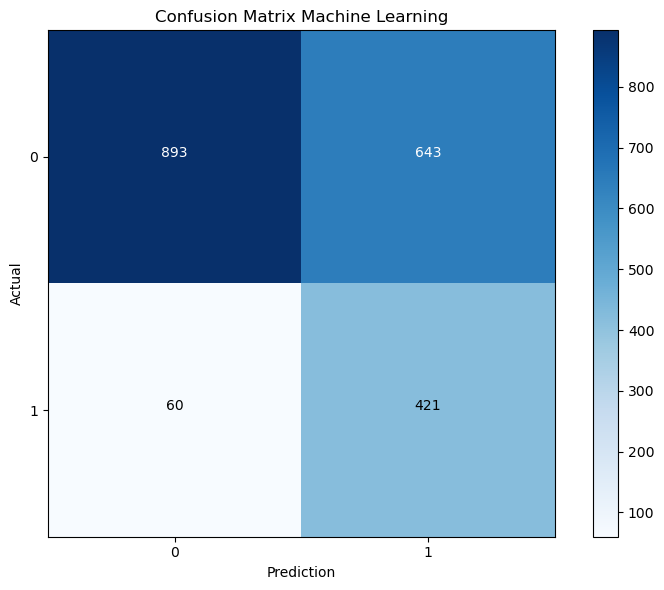

In [354]:
# Create the confusion matrix
confusion_matrix_final = pd.crosstab(df_test['is_canceled'], y_pred_test, rownames=['Actual'], colnames=['Prediction'])

# Plot using matplotlib
plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix_final, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Machine Learning')
plt.colorbar()

# Add labels and ticks
tick_marks = np.arange(len(confusion_matrix_final.columns))
plt.xticks(tick_marks, confusion_matrix_final.columns)
plt.yticks(tick_marks, confusion_matrix_final.index)

# Add text annotations for each cell
thresh = confusion_matrix_final.values.max() / 2
for i, j in np.ndindex(confusion_matrix_final.shape):
    plt.text(j, i, format(confusion_matrix_final.iloc[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_final.iloc[i, j] > thresh else "black")

# Labels
plt.ylabel('Actual')
plt.xlabel('Prediction')

# Show the plot
plt.tight_layout()
plt.show()


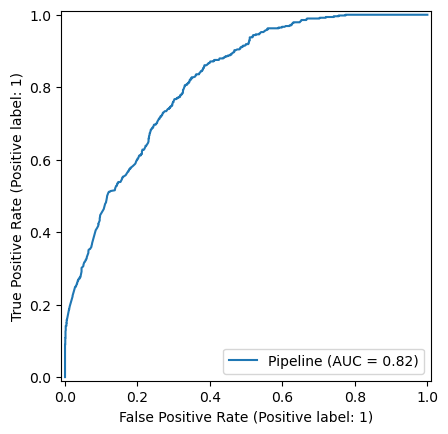

In [355]:
RocCurveDisplay.from_estimator(tuned_model,X_test, y_test)

AUC mewakili tingkat atau ukuran pemisahan antara kelas-kelas. Ini menggambarkan seberapa efektif model dalam membedakan antara kelas yang berbeda.

AUC sebesar 0,82 menunjukkan bahwa ada kemungkinan 82% model dapat membedakan antara kelas positif dan kelas negatif.

## Rule-Based Prediction

Penentuan pemberian score pada pelanggan menggunakan parameter berikut:

1. **Market Segment**:
   - Jika pelanggan berasal dari "Online TA" (Travel Agency) atau "Groups", tambah 1 score.
   - **Alasan**: Pelanggan dari segmen ini lebih mungkin untuk membatalkan.

2. **Previous Cancelation**:
   - Jika pelanggan pernah membatalkan sebelumnya, tambah 2 score.
   - **Alasan**: Pelanggan yang pernah membatalkan biasanya lebih mungkin membatalkan lagi.

3. **Deposit Type**:
   - Jika depositnya **Non Refund**, tidak menambah score.
   - Jika **No Deposit** atau **Refundable**, tambah 1 score.
   - **Alasan**: Deposit yang fleksibel (dapat dikembalikan atau tanpa deposit) lebih memudahkan pembatalan.

4. **Booking Changes**:
   - Jika pelanggan melakukan lebih dari 2 perubahan pemesanan, tambah 1 score.
   - **Alasan**: Banyak perubahan bisa berarti rencana yang tidak pasti.

5. **Days in Waiting List**:
   - Jika menunggu lebih dari 50 hari, tambah 1 score.
   - **Alasan**: Waktu tunggu lama bisa membuat pelanggan membatalkan.

6. **Total of Special Requests**:
   - Jika tidak ada permintaan khusus, tambah 1 score.
   - **Alasan**: Pelanggan tanpa permintaan khusus mungkin kurang terikat pada pesanan mereka.

7. **Continent**:
   - Jika dari **Afrika** atau **Asia**, tambah 2 score.
   - Jika dari **Eropa** atau **Amerika Selatan**, tambah 1 score.
   - **Alasan**: Pelanggan dari beberapa benua mungkin lebih sering membatalkan.

8. **Is Canceled Prediction**:
   - Jika total score pelanggan lebih besar atau sama dengan rata-rata score pada seluruh pelanggan, maka akan di prediksi akan melakukan pembatalan reservasi. Jika kurang, maka akan di prediksi tidak akan membatalkan reservasi.


F2 score of rule-based model: 0.467
Test:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1536
           1       0.33      0.52      0.41       481

    accuracy                           0.64      2017
   macro avg       0.58      0.60      0.57      2017
weighted avg       0.70      0.64      0.66      2017



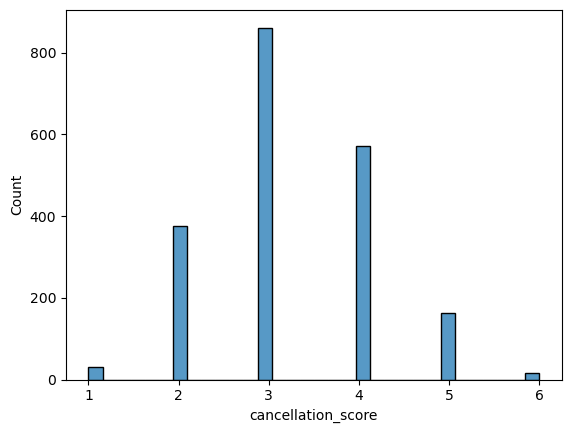

In [356]:
def calculate_cancellation_score(row):
    score = 0
    
    # Score for Market Segment
    if row['market_segment'] in ['Online TA', 'Groups']:
        score += 1
    
    # Score for Previous Cancellations
    if row['previous_cancellations'] > 0:
        score += 2
    
    # Score for Deposit Type
    if row['deposit_type'] == 'Non Refund':
        score += 0
    elif row['deposit_type'] in ['No Deposit', 'Refundable']:
        score += 1
    
    # Score for Booking Changes
    if row['booking_changes'] > 2:
        score += 1
    
    # Score for Days in Waiting List
    if row['days_in_waiting_list'] > 50:
        score += 1
    
    # Score for Special Requests
    if row['total_of_special_requests'] == 0:
        score += 1
    
    # Score for continent
    if row['continent'] in ['Africa', 'Asia']:
        score += 2
    elif row['continent'] in ['Europe', 'South America']:
        score += 1
    elif row['continent'] in ['Oceania', 'North America']:
        score += 0
    
    return score

# Apply the scoring function to the dataset
df_test['cancellation_score'] = df_test.apply(calculate_cancellation_score, axis=1)

# Calculate the mean of the scores
mean_score = df_test['cancellation_score'].mean()

# Predict cancellation: if the score is greater than or equal to the mean score, predict cancellation
df_test['is_canceled_pred'] = np.where(df_test['cancellation_score'] >= mean_score, 1, 0)

# Calculate accuracy of the scoring model
f2 = fbeta_score(df_test['is_canceled'], df_test['is_canceled_pred'],beta=2)
print(f'F2 score of rule-based model: {f2:.3f}')

# Check the distribution of scores
sns.histplot(df_test['cancellation_score'])


print(f'Test:\n{classification_report(y_test,df_test["is_canceled_pred"])}')


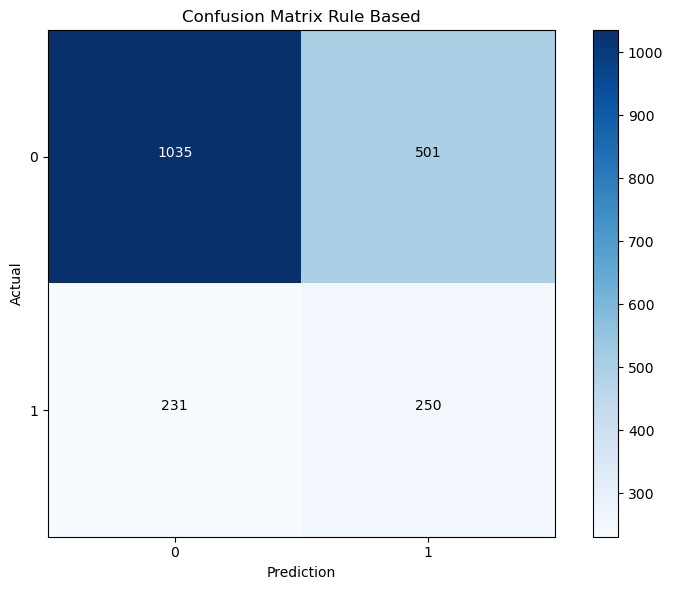

In [357]:
# Create the confusion matrix
confusion_matrix_final = pd.crosstab(df_test['is_canceled'], df_test["is_canceled_pred"], rownames=['Actual'], colnames=['Prediction'])

# Plot using matplotlib
plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix_final, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Rule Based')
plt.colorbar()

# Add labels and ticks
tick_marks = np.arange(len(confusion_matrix_final.columns))
plt.xticks(tick_marks, confusion_matrix_final.columns)
plt.yticks(tick_marks, confusion_matrix_final.index)

# Add text annotations for each cell
thresh = confusion_matrix_final.values.max() / 2
for i, j in np.ndindex(confusion_matrix_final.shape):
    plt.text(j, i, format(confusion_matrix_final.iloc[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_final.iloc[i, j] > thresh else "black")

# Labels
plt.ylabel('Actual')
plt.xlabel('Prediction')

# Show the plot
plt.tight_layout()
plt.show()


## Machine Learning vs Rule Based

Dengan asumsi harga kamar hotel sebesar **Rp 700.000** per malam, mari kita hitung skenario dunia nyata untuk kedua model.


1. Confusion Matrix Model Machine Learning:

| Prediksi   | 0  | 1  |
|----------------|--------|--------|
| Aktual 0   | 893| 643|
| Aktual 1   | 60 | 421|

- True Negatives (TN) = 893: 893 pelanggan yang diprediksi tidak membatalkan, ternyata memang tidak membatalkan.
- False Positives (FP) = 643: 643 pelanggan diprediksi akan membatalkan, tetapi ternyata tidak.
- False Negatives (FN) = 60: 60 pelanggan yang diprediksi tidak membatalkan, tetapi ternyata membatalkan.
- True Positives (TP) = 421: 421 pelanggan diprediksi membatalkan, dan benar-benar membatalkan.

Skenario:
- TP (421 pembatalan diprediksi dan ditindaklanjuti): 
  Hotel dapat mengambil tindakan pada 421 pembatalan ini, misalnya dengan memberikan promo atau menjual ulang kamar. Misalkan hotel berhasil menjual ulang 80% dari kamar yang dibatalkan:
  - 421 pembatalan × 80% = 337 kamar terjual kembali.
  - Penghematan Finansial: 337 kamar × Rp 700.000 = Rp 235.900.000 diselamatkan.

- FN (60 pembatalan tidak diprediksi, menyebabkan kerugian): 
  Kamar-kamar ini tidak diprediksi akan dibatalkan, sehingga hotel tidak siap menghadapi pembatalan.
  - Kerugian Finansial: 60 kamar × Rp 700.000 = Rp 42.000.000 hilang.

- FP (643 non-pembatalan diprediksi sebagai pembatalan): 
  Hotel salah memprediksi 643 pelanggan akan membatalkan. Meskipun tidak ada kerugian finansial langsung, mungkin ada biaya operasional yang kecil akibat tindakan yang tidak perlu seperti memberikan promo.

Ringkasan untuk Model Machine Learning:
- Pendapatan yang Diselamatkan: Rp 235.900.000.
- Kerugian (karena FN): Rp 42.000.000.
- Dampak Bersih Pendapatan: Rp 235.900.000 - Rp 42.000.000 = Rp 193.900.000 diselamatkan per malam.


2. Confusion Matrix Model Rule-Based:

| Prediksi   | 0  | 1  |
|----------------|--------|--------|
| Aktual 0   | 1035| 501|
| Aktual 1   | 231 | 250|

- True Negatives (TN) = 1035: 1035 pelanggan yang diprediksi tidak membatalkan, ternyata memang tidak membatalkan.
- False Positives (FP) = 501: 501 pelanggan diprediksi akan membatalkan, tetapi ternyata tidak.
- False Negatives (FN) = 231: 231 pelanggan yang diprediksi tidak membatalkan, tetapi ternyata membatalkan.
- True Positives (TP) = 250: 250 pelanggan diprediksi membatalkan, dan benar-benar membatalkan.

Skenario:
- TP (250 pembatalan diprediksi dan ditindaklanjuti): 
  Hotel dapat mengambil tindakan pada 250 pembatalan ini dan berhasil menjual ulang 80% dari kamar yang dibatalkan:
  - 250 pembatalan × 80% = 200 kamar terjual kembali.
  - Penghematan Finansial: 200 kamar × Rp 700.000 = Rp 140.000.000 diselamatkan.

- FN (231 pembatalan tidak diprediksi, menyebabkan kerugian): 
  Kamar-kamar ini tidak diprediksi akan dibatalkan, sehingga hotel mengalami kerugian karena tidak siap.
  - Kerugian Finansial: 231 kamar × Rp 700.000 = Rp 161.700.000 hilang.

- FP (501 non-pembatalan diprediksi sebagai pembatalan): 
  Tidak ada kerugian langsung, namun mungkin ada biaya operasional kecil akibat langkah-langkah yang tidak perlu seperti menawarkan promo.

Ringkasan untuk Model Rule-Based:
- Pendapatan yang Diselamatkan: Rp 140.000.000.
- Kerugian (karena FN): Rp 161.700.000.
- Dampak Bersih Pendapatan: Rp 140.000.000 - Rp 161.700.000 = Rp 21.700.000 hilang per malam.


Perbandingan Dampak Finansial:

1. Model Machine Learning:
   - Pendapatan Diselamatkan per Malam: Rp 193.900.000.
   - Kerugian akibat False Negatives: 60 kamar, Rp 42.000.000.
   - Dampak Bersih: Rp 193.900.000 diselamatkan per malam.

2. Model Rule-Based:
   - Pendapatan Diselamatkan per Malam: Rp 140.000.000.
   - Kerugian akibat False Negatives: 231 kamar, Rp 161.700.000.
   - Dampak Bersih: Rp 21.700.000 hilang per malam.


Dampak Tahunan (365 hari):

1. Model Machine Learning:
   - Penghematan Tahunan: Rp 193.900.000 × 365 = Rp 70.273.500.000 diselamatkan per tahun.

2. Model Rule-Based:
   - Kerugian Tahunan: Rp 21.700.000 × 365 = Rp 7.920.500.000 hilang per tahun.

Kesimpulan:
Model machine learning jauh lebih unggul dibandingkan model rule-based. Hotel dapat menyelamatkan Rp 70.273.500.000 per tahun dengan model machine learning, sedangkan model rule-based justru menyebabkan kerugian sebesar Rp 7.920.500.000 akibat jumlah false negatives yang lebih tinggi. Oleh karena itu, model machine learning lebih efektif dalam memprediksi dan mengelola pembatalan, serta memaksimalkan pendapatan hotel.

## Model Constraints

Kita telah mengetahui bahwa model based jauh lebih baik terhadap performa bisnis. Dikarenakan model ini hasil dari pelatihan pada data Train, model hanya dapat bekerja dengan baik pada rentan tertentu. Berikut adalah batasan data yang dapat diterima oleh model untuk memprediksi.

In [358]:
X_train.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000
mean,0.089140,0.795686,3.670717,0.166377,0.938011
std,0.829472,1.285104,22.614140,0.397251,1.040590
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000
max,25.000000,21.000000,391.000000,8.000000,5.000000


In [359]:
#Melihat unique values pada data train
pd.set_option('display.max_colwidth', None)

columns = X_train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = X_train[i].unique()
    nunique = X_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,market_segment,"[Offline TA/TO, Online TA, Direct, Corporate, Complementary, Groups, Aviation]",7
1,deposit_type,"[No Deposit, Non Refund, Refundable]",3
2,customer_type,"[Transient-Party, Transient, Group, Contract]",4
3,reserved_room_type,"[A, C, D, G, F, E, H, B, L]",9
4,continent,"[Europe, South America, North America, Asia, Africa, Oceania, Antartica]",7


Model hanya dapat bekerja dengan baik jika data yang diuji memenuhi kriteria berikut:

| Feature  | Range Nilai                        | Nilai yang Diperbolehkan                                                                                                    |
|-----------|-----------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| previous_cancellations      | 0 - 25          | -                                                                                                                           |
| booking_changes             | 0 - 21          | -                                                                                                                           |
| days_in_waiting_list        | 0 - 391         | -                                                                                                                           |
| required_car_parking_spaces | 0 - 8           | -                                                                                                                           |
| total_of_special_requests   | 0 - 5           | -                                                                                                                           |
| market_segment              | -               | Offline TA/TO, Online TA, Direct, Corporate, Complementary, Groups, Aviation                                                |
| deposit_type                | -               | No Deposit, Non Refund, Refundable                                                                                          |
| customer_type               | -               | Transient-Party, Transient, Group, Contract                                                                                 |
| reserved_room_type          | -               | A, C, D, G, F, E, H, B, L                                                                                                   |
| continent                   | -               | Europe, South America, North America, Asia, Africa, Oceania, Antartica                                                      |

Dan model hanya dapat digunakan pada data yang tidak memiliki missing value, memiliki semua data dengan kolom diatas dan menggunakan threshold probabilitas 0.36.

---

# Conclusion and Recommendation

## Conclusion:

Berdasarkan perbandingan antara model machine learning dan model rule based, jelas bahwa model machine learning mengungguli model rule based dalam memprediksi pembatalan reservasi hotel, terutama dalam hal meminimalkan false negative, yang sangat penting untuk strategi manajemen pendapatan hotel.

1. **Kinerja Model Machine Learning:**
   - Model machine learning menunjukkan skor F2 yang lebih tinggi yaitu sebesar 0.704, yang menunjukkan keseimbangan yang lebih baik antara precision dan recall, dengan fokus yang lebih kuat pada recall. Hal ini menunjukkan bahwa model ini efektif dalam mengidentifikasi potensi pembatalan, meskipun harus mengorbankan beberapa precision.
   - Dalam hal recall, model machine learning berhasil mengidentifikasi 88% pembatalan aktual. Hal ini signifikan karena sejalan dengan tujuan bisnis untuk mengurangi false negative dan memastikan bahwa potensi pembatalan ditemukan.
2. **Faktor Utama yang Mempengaruhi Pembatalan reservasi:**
   - **Required Car Parking Spaces**:
      - Pemesanan dengan kebutuhan parkir lebih banyak cenderung **tidak dibatalkan**.
   - **Market Segment Online TA**:
      - Pemesanan melalui OTA lebih berisiko dibatalkan.
   - **Customer Type Transient**:
      - Pelanggan transient lebih mungkin membatalkan.
   - **Total of Special Requests**:
      - Banyak permintaan khusus menurunkan risiko pembatalan.
   - **Booking Changes**:
      - Semakin sering perubahan, semakin rendah risiko pembatalan.
   - **Previous Cancelation**:
      - Tamu dengan riwayat pembatalan lebih mungkin membatalkan lagi.
   - **Deposit Type Non-Refund**:
      - Opsi non-refundable meningkatkan risiko pembatalan.
2. **Kinerja Model Rule Based:**
   - Model berbasis aturan menunjukkan kinerja yang kurang baik dengan skor F2 sebesar 0.467. Meskipun memiliki presisi yang relatif rendah dalam mendeteksi pembatalan (0.33), model ini juga mengalami kesulitan dalam hal recall untuk pembatalan (0.52). Hal ini menunjukkan bahwa pendekatan berbasis aturan kurang efektif dalam mengidentifikasi potensi pembatalan, sehingga menyebabkan banyak peluang terlewat untuk manajemen proaktif.
   - Secara keseluruhan, model berbasis aturan gagal mencapai recall yang diinginkan, yang mengakibatkan lebih banyak false negative (48%). Situasi ini dapat menyebabkan kerugian finansial yang lebih besar akibat pembatalan reservasi yang tidak terduga.

3. **Skenario:**

   **Model Machine Learning:**
   - **True Positive (TP):** 421 pembatalan diprediksi; 337 (80%) kamar berhasil dijual kembali.
   - **Pendapatan Diselamatkan:** Rp 235.900.000.
   - **False Negative (FN):** 60 pembatalan tidak terdeteksi; kerugian Rp 42.000.000.
   - **Dampak Bersih Pendapatan:** Rp 193.900.000 diselamatkan per malam.

   **Model Rule Based:**
   - **True Positive (TP):** 250 pembatalan diprediksi; 200 (80%) kamar berhasil dijual kembali.
   - **Pendapatan Diselamatkan:** Rp 140.000.000.
   - **False Negative (FN):** 231 pembatalan tidak terdeteksi; kerugian Rp 161.700.000.
   - **Dampak Bersih Pendapatan:** Rp 21.700.000 hilang per malam.

---

## Recommendation:

Berdasarkan analisis perbandingan antara model machine learning dan model rule based dalam memprediksi pembatalan reservasi hotel, disarankan untuk mengadopsi model machine learning sebagai pendekatan utama. Model ini menunjukkan kinerja yang jauh lebih baik dalam meminimalkan false negative, yang merupakan kunci untuk strategi manajemen pendapatan yang efektif. 

1. **Keunggulan Model Machine Learning:**
   - Dengan skor F2 sebesar 0.704, model machine learning menunjukkan keseimbangan yang lebih baik antara precision dan recall, dengan fokus yang kuat pada recall. 
   - Penyelamatan pendapatan yang signifikan Rp 193.900.000 per malam dari model machine learning, dibandingkan dengan kerugian Rp 21.700.000 per malam dari model rule based, menunjukkan dampak positif yang dapat dihasilkan oleh model ini terhadap kesehatan finansial hotel.
2. **Pengumpulan Fitur Baru:**
   Untuk meningkatkan akurasi model machine learning, penting untuk mengumpulkan fitur tambahan yang dapat memberikan wawasan lebih dalam mengenai faktor-faktor yang mempengaruhi pembatalan. Beberapa rekomendasi fitur baru meliputi:
   - **Waktu Pemesanan:** Menyimpan informasi mengenai berapa lama sebelum check-in reservasi dilakukan. Data ini bisa membantu dalam menganalisis pola pembatalan terkait dengan waktu.
   - **Jumlah Kamar yang Dipesan:** Mengetahui jumlah kamar yang dipesan dalam satu reservasi dapat memberikan informasi tentang kebiasaan pelanggan.
   - **Jenis Pembayaran:** Mengumpulkan informasi tentang metode pembayaran yang digunakan (misalnya, kartu kredit, transfer bank) bisa memberikan insight tentang keandalan pelanggan dalam memenuhi pembayaran.
   - **Kebijakan Pembatalan:** Informasi mengenai kebijakan pembatalan yang dipilih oleh pelanggan dapat memberikan konteks tentang tingkat risiko pembatalan.
   - **Rating dan Ulasan Pelanggan:** Mengumpulkan data tentang rating dan ulasan yang diberikan oleh pelanggan sebelumnya dapat membantu memahami perilaku pelanggan.
   - **Musiman dan Event Khusus:** Mengumpulkan informasi tentang event atau musim tertentu yang dapat memengaruhi tingkat hunian dan pembatalan, misalnya, liburan atau festival lokal.

Dengan mengintegrasikan fitur-fitur baru ini ke dalam model, hotel dapat meningkatkan daya prediksi model dan lebih baik memahami faktor-faktor yang berkontribusi terhadap pembatalan. Hal ini tidak hanya akan meningkatkan akurasi prediksi, tetapi juga memberikan insight yang lebih mendalam untuk strategi manajemen pendapatan dan pengalaman pelanggan.

3. **Implementasi dan Monitoring:**
   Setelah model machine learning diadopsi, penting untuk terus memantau kinerjanya secara berkala. Dengan melakukan evaluasi rutin terhadap akurasi model dan penyesuaian berdasarkan data terbaru, hotel dapat memastikan bahwa model tetap relevan dan efektif dalam mengidentifikasi potensi pembatalan. Selain itu, melakukan pelatihan ulang model dengan data baru secara berkala akan membantu menjaga performa model dalam jangka panjang.

Secara keseluruhan, dengan mengadopsi model machine learning dan mengumpulkan fitur tambahan, hotel dapat mengambil langkah proaktif dalam mengelola pembatalan, memaksimalkan pendapatan, dan meningkatkan pengalaman pelanggan.

---

# Deployment Model

In [360]:
# Menggabungkan feature pada data train dan data test
X_final = pd.concat([X_train,X_test])

# Menggabungkan label pada data train dan data test
y_final = pd.concat([y_train,y_test])

#Fit model ke feature dan label yang telah digabung.
tuned_model.fit(X_final,y_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type',
       'continent'],
      dtype='object'))])),
                ('smote', RandomOverSampler(random_state=1)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            min_samples_leaf=2,
                                            min_samples_split=5,
                                            n_estimators=300,
                                            random_state=1))])

In [361]:
import pickle

#Saving model
filename = 'HotelReservationCancellationPredictor.sav'

# # Untuk melakukan saving model, dapat melakukan uncomment untuk code dibawah

# pickle.dump(tuned_model,open(filename,'wb'))